**IMPORTING Libraries**

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**Renaming colums**

In [4]:
df.rename(columns={"Delivery Time":"delivery_time","Sorting Time":"shorting_time"},inplace=True)

In [5]:
df.info() #as we see we have no null values in are data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   shorting_time  21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


***Correlation coefficient of variables***

In [6]:
df.corr()

,delivery_time,shorting_time
delivery_time,1.000000,0.825997
shorting_time,0.825997,1.000000


**Checking ouliers and visulization**

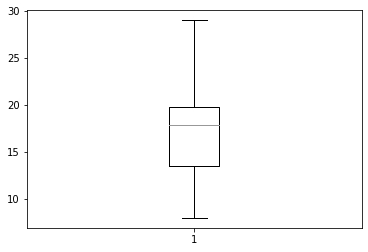

In [7]:
plt.boxplot(df["delivery_time"])
plt.show()

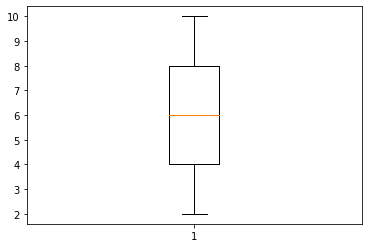

In [8]:
plt.boxplot(df["shorting_time"])
plt.show()

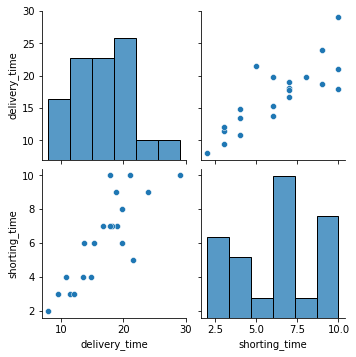

In [9]:
sns.pairplot(df)
plt.show()

**Creating model**

In [10]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~shorting_time",data=df).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


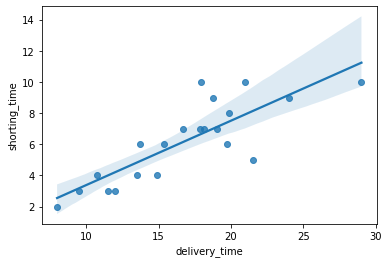

In [11]:
sns.regplot(x="delivery_time", y="shorting_time", data=df)

In [12]:
model.params

Intercept        6.582734
shorting_time    1.649020
dtype: float64

In [13]:
model.pvalues   #As we see p value is less than 0.05 we can say value is significant

Intercept        0.001147
shorting_time    0.000004
dtype: float64

In [14]:
print("r^2 :",model.rsquared) #Accurancy of model is Good

r^2 : 0.6822714748417231


In [15]:
delivery_pre=model.predict(df["shorting_time"])


In [16]:
df["delivery_time_pre"]=delivery_pre
df

,delivery_time,shorting_time,delivery_time_pre
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


**Predicting Delivery time**

In [17]:
#x=int(input("sorting_time :"))
#print("Delivery_Time :", 6.582734+1.649020*x)